In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['target'] = pd.Series(iris.target)
df['target_names'] = pd.Series(iris.target_names)
species = []
for i in range(len(df)):
    if (df.iloc[i]['target'] == 0):
        species.append('setosa')
    elif (df.iloc[i]['target'] == 1):
        species.append('versicolor')
    elif (df.iloc[i]['target'] == 2):
        species.append('virginica')
df['Species'] = species

df

,sepal_length,sepal_width,petal_length,petal_width,target,target_names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN,virginica
146,6.3,2.5,5.0,1.9,2,NaN,virginica
147,6.5,3.0,5.2,2.0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,2,NaN,virginica


In [4]:
x=iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

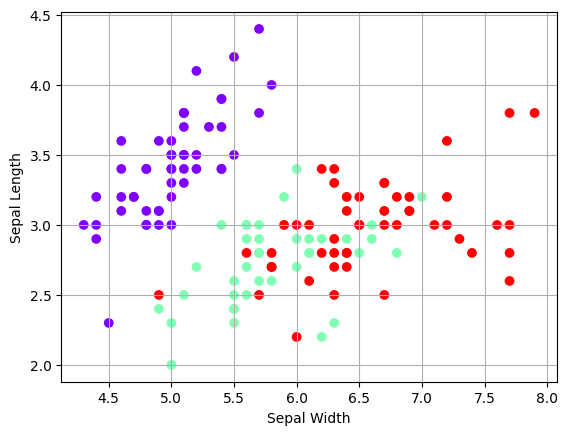

In [5]:
plt.scatter(x=df['sepal_length'], y=df['sepal_width'], c=iris.target, cmap='rainbow')
plt.grid(True)
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.show()

C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.

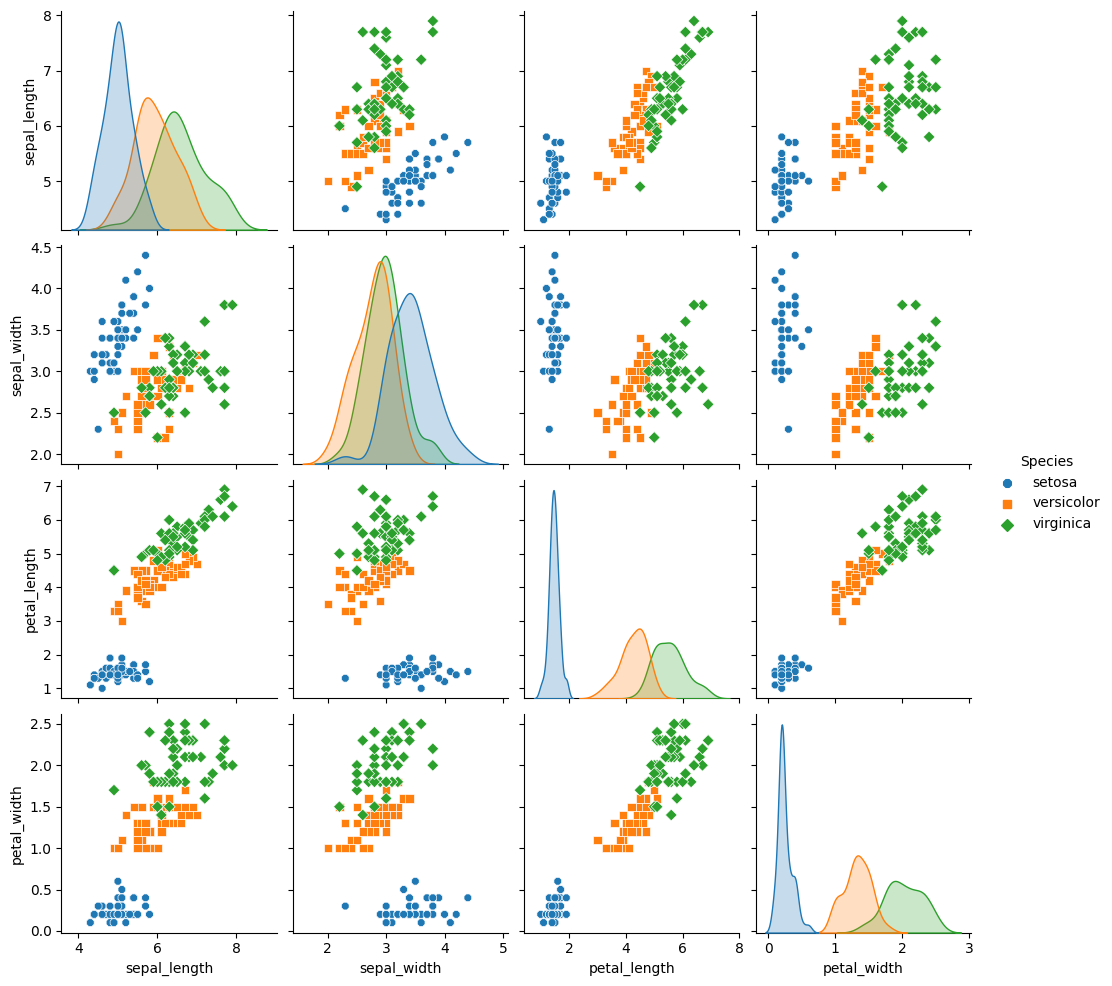

In [6]:
sns.pairplot(df.drop(['target'], axis=1), hue = 'Species', height = 2.5, markers = ['8','s','D']) 
#Blue - Setosa, #Orange - Versicolor, #Green - Virginica

In [7]:
kmeans5 = KMeans(n_clusters=5, init= 'k-means++', random_state=5)
y = kmeans5.fit_predict(x)
print(y)

[3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 3 0 0 0 0 3 3 3 3 3 0 3 3 3 0 0 0 3 3 0
 3 3 3 3 3 3 3 0 3 0 3 0 3 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 4 1 1
 1 1 1 1 1 4 4 4 4 1 4 1 1 1 4 4 4 1 4 4 4 4 4 4 4 4 2 1 2 1 2 2 4 2 2 2 1
 1 2 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1
 1 1]


C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
kmeans5.cluster_centers_

array([[5.37058824, 3.8       , 1.51764706, 0.27647059],
       [6.29375   , 2.8875    , 4.93958333, 1.72083333],
       [7.08695652, 3.12608696, 6.01304348, 2.14347826],
       [4.81818182, 3.23636364, 1.43333333, 0.23030303],
       [5.55517241, 2.64482759, 3.97241379, 1.23103448]])

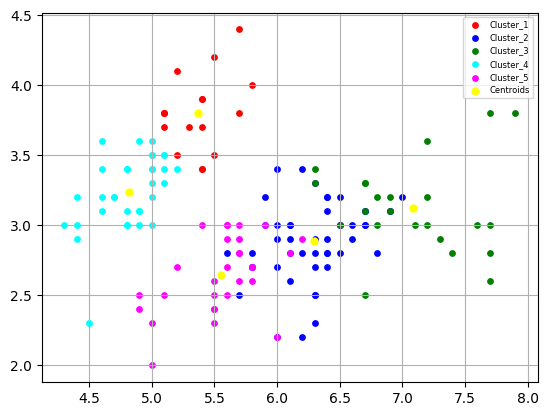

In [9]:
plt.scatter(x[y==0,0], x[y==0,1], s=15, c='red', label = 'Cluster_1')
plt.scatter(x[y==1,0], x[y==1,1], s=15, c='blue', label = 'Cluster_2')
plt.scatter(x[y==2,0], x[y==2,1], s=15, c='green', label = 'Cluster_3')
plt.scatter(x[y==3,0], x[y==3,1], s=15, c='cyan', label = 'Cluster_4')
plt.scatter(x[y==4,0], x[y==4,1], s=15, c='magenta', label = 'Cluster_5')

plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s = 25, c = 'yellow', label = 'Centroids')

plt.legend(loc=1, fontsize = 6)
plt.grid(True)
plt.show()

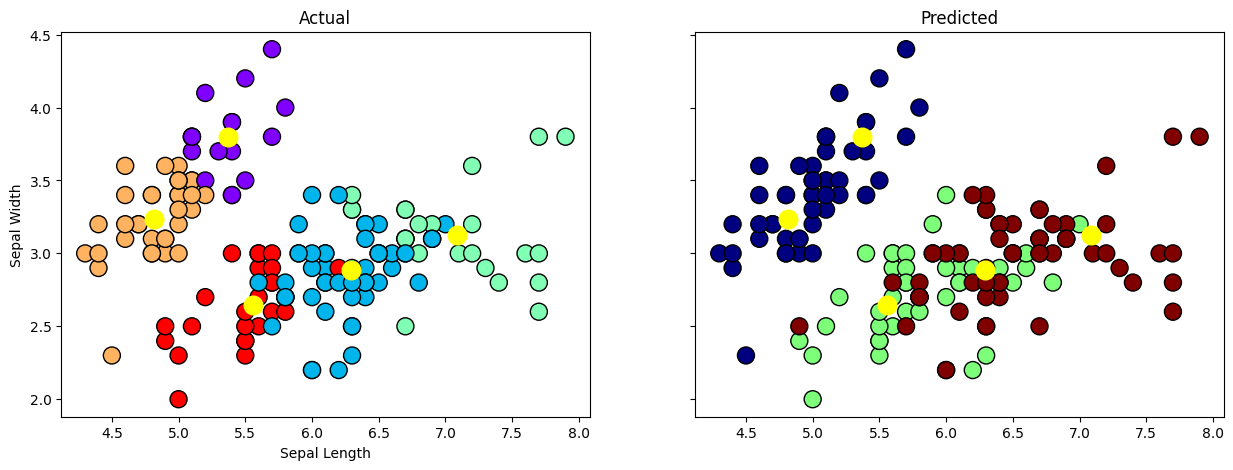

In [10]:
fig, axs = plt.subplots(1,2,figsize=(15,5), sharey=True)
axs[0].scatter(x=df['sepal_length'], y=df['sepal_width'], c=y, cmap='rainbow', edgecolors='k', s=150)
axs[1].scatter(x=df['sepal_length'], y=df['sepal_width'], c=iris.target, cmap='jet', edgecolors='k', s=150)
axs[0].scatter(kmeans5.cluster_centers_[:,0],kmeans5.cluster_centers_[:,1], s=180, c='yellow',label='Centroids')
axs[1].scatter(kmeans5.cluster_centers_[:,0],kmeans5.cluster_centers_[:,1], s=180, c='yellow',label='Centroids')

axs[0].set_title('Actual')
axs[1].set_title('Predicted')
axs[0].set_ylabel('Sepal Width')
axs[0].set_xlabel('Sepal Length')

plt.show()